In [1]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To have two pandas data tables next to each other - https://stackoverflow.com/a/38801975
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 5)

Populating the interactive namespace from numpy and matplotlib


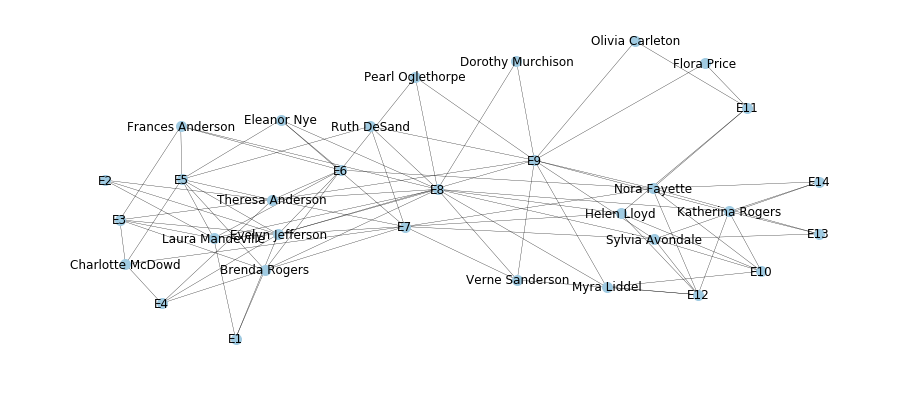

In [6]:
G = nx.davis_southern_women_graph()

# This particular code separates the two sets of nodes into 'women' and the other 'clubs'
women = G.graph['top']
clubs = G.graph['bottom']

# Draw the bipartite graph of women and clubs
import matplotlib.pyplot as plt
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), node_color='#A0CBE2', width=.3, with_labels=True, node_size = 100)
plt.show()

### Clustering Coefficient

> This measure will help us understand how many clusters exists between the women and between the events. 

In [8]:
import pandas as pd

Events = bipartite.weighted_projected_graph(G, clubs)
Women  = bipartite.weighted_projected_graph(G, women)

Women_cluster  = pd.DataFrame(zip(nx.clustering(Women).keys(), nx.clustering(Women).values())).sort_values(by = [1], axis=0, ascending=True)
Women_cluster
Events_cluster = pd.DataFrame(zip(nx.clustering(Events).keys(), nx.clustering(Events).values())).sort_values(by = [1], axis=0, ascending=True)
Events_cluster

,0,1
0,Theresa Anderson,0.897059
14,Ruth DeSand,0.897059
12,Evelyn Jefferson,0.897059
6,Verne Sanderson,0.897059
5,Sylvia Avondale,0.897059
17,Helen Lloyd,0.897059
4,Nora Fayette,0.897059
3,Katherina Rogers,0.933333
16,Myra Liddel,0.933333
11,Dorothy Murchison,0.933333


,0,1
5,E9,0.679487
6,E8,0.679487
9,E7,0.679487
10,E6,0.679487
0,E11,1.000000
1,E10,1.000000
2,E13,1.000000
3,E12,1.000000
4,E14,1.000000
7,E5,1.000000


### Cliques
> There are 3 cliques forming within the group of women. We see that Flora Price and Olivia Carleton are part of one clique only whereas many of the other women are part of the other cliques. I'd be interested to know how these women came to be part of this group if they are such outsiders to the other cliques. In a social network I can imagine that these may be a very select group if they are attending the import social events only. Ancedontally, I am thinking that maybe the other women are attending several social events to gain status and the more influencial women only have to attend a few as they have reached a higher status within the group.

> It appears that there are two cliques from the events which we expected from our clustering coefficients. The events with .67 for the clustering coefficient are the connections between the two cliques. I would be curious to find out what kind of social events these truly are as it seems that few attend both groups of events. If the importance of the events or types were available I suspect that a pattern may be more easily visible. 

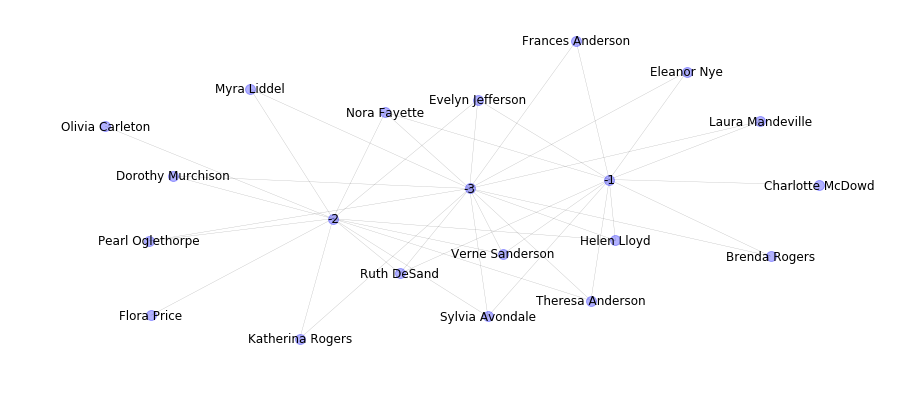

In [9]:
Women = bipartite.weighted_projected_graph(G, women)
W_cliques = nx.make_clique_bipartite(Women, G)
nx.draw(W_cliques, pos=nx.fruchterman_reingold_layout(W_cliques), node_color='b', alpha = .3, edge_color='none', width=.3, with_labels=True, node_size = 100)
plt.show()

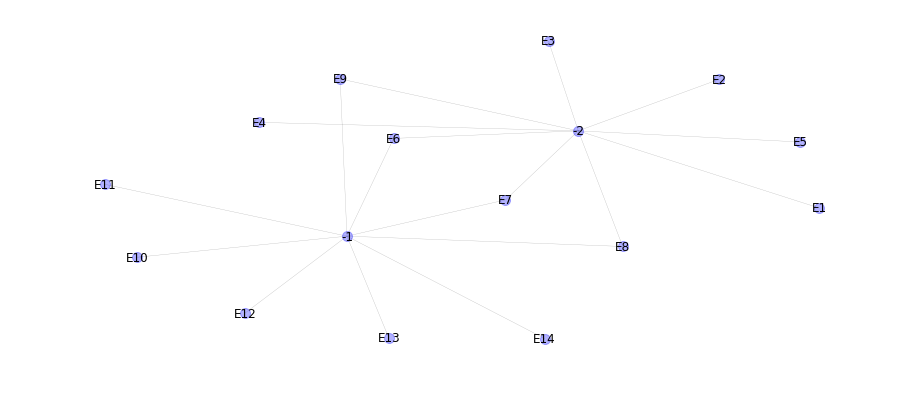

In [11]:
Events = bipartite.weighted_projected_graph(G, clubs)
E_cliques = nx.make_clique_bipartite(Events, G)
nx.draw(E_cliques, pos=nx.fruchterman_reingold_layout(E_cliques), node_color='b', alpha = .3, edge_color='none', width=.3, with_labels=True, node_size = 100)
plt.show()

### Ego graph
> Based on the clustering coefficient we looked at Flora Price and Brenda Rogers, as we can see Flora price has fewer connections and only connected to one cluster. Brenda Rogers went to many social events and has a lower cluster coefficient as she is connected to several clusters. 

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


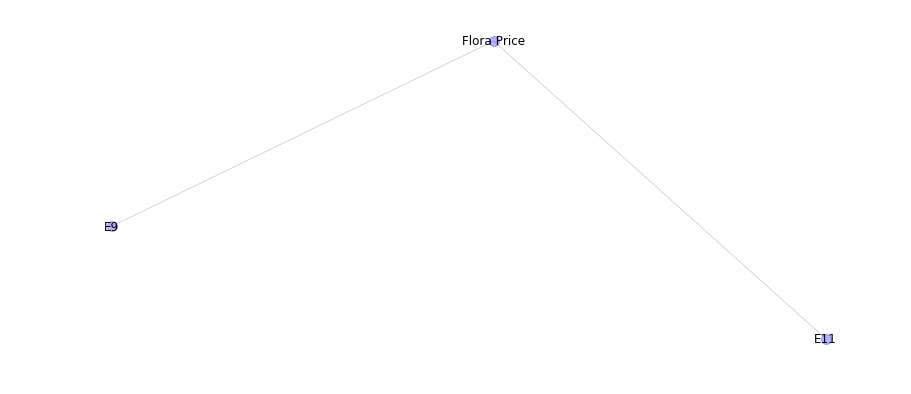

In [12]:
x = nx.ego_graph(G, 'Flora Price', center = True, undirected = True)
print(nx.info(x))
nx.draw(x,  node_color='b', alpha = .3, edge_color='none', width=.5, with_labels=True, node_size = 100)

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 7
Average degree:   1.7500


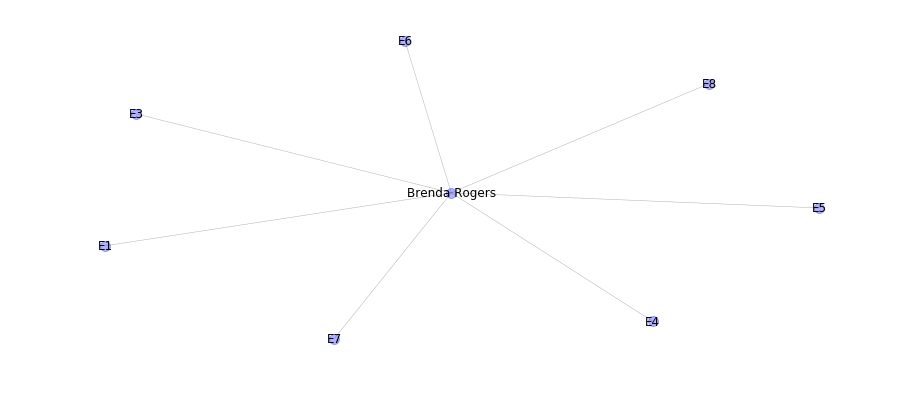

In [13]:
x = nx.ego_graph(G, 'Brenda Rogers', center = True, undirected = True)
print(nx.info(x))
nx.draw(x,  node_color='b', alpha = .3, edge_color='none', width=.5, with_labels=True, node_size = 100)

### Graphs highlighting the weights for the connections from the graph

> This is a supplemental, I am proposing to use these graph styles for the final work product

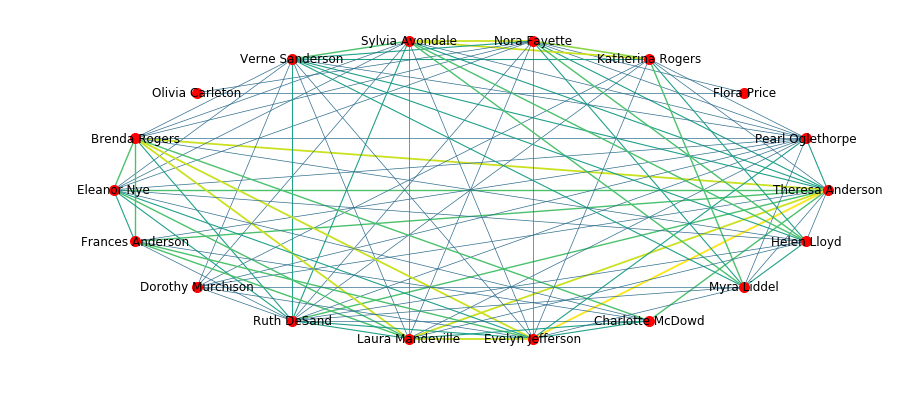

In [14]:
import math
W = bipartite.weighted_projected_graph(G, women)
weights = [math.log(edata['weight']) for f,t,edata in W.edges(data=True)]
nx.draw(W, pos=nx.shell_layout(W), width=weights, edge_color=weights, with_labels=True, node_size = 100)
plt.show()

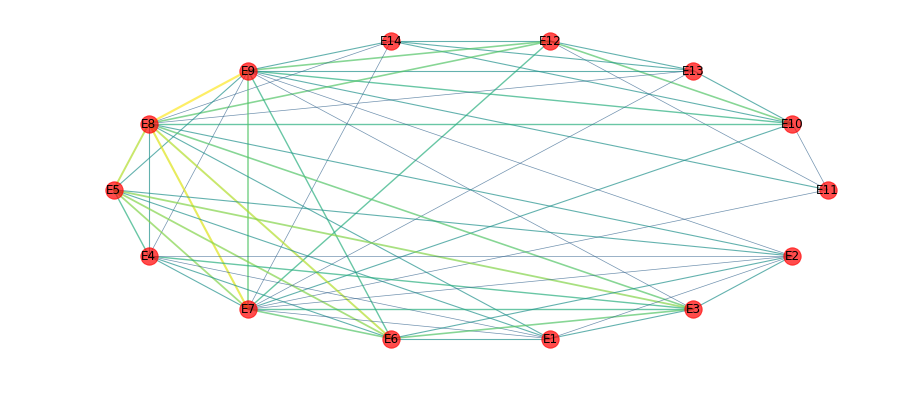

In [15]:
weights=[math.log(edata['weight']) for f,t,edata in Events.edges(data=True)]
nx.draw(Events, pos=nx.shell_layout(Events), width=weights, edge_color=weights, with_labels=True, alpha = .7)
plt.show()